### Problem 1 2D Kernel Density Estimator

### Smoothing for Data Visualization
Why smoothing? The notebook think because for more information in visualization. One of the example is histogram is a way of smoothing. In another sense, those smoothing estimator could also called the kernel estimator.


### Kernel Density Estimation in Practice
The free parameters of kernel density estimation are the kernel, which specifies the shape of the distribution placed at each point, and the kernel bandwidth, which controls the size of the kernel at each point. In practice, there are many kernels you might use for a kernel density estimation: in particular, six kernels in Scikit-Learn's. The kernel bandwidth, which is a free parameter, can be determined using Scikit-Learn's standard cross validation tools as we will soon see.

### Choice of bandwith is trade of bias-variance
The choice of bandwidth within KDE is extremely important to finding a suitable density estimate, and is the knob that controls the __bias–variance trade-off__:<br> 
too narrow a bandwidth - high-variance estimate (i.e., over-fitting) - a single point makes a large difference. <br>
Too wide a bandwidth - high-bias estimate (i.e., under-fitting) where the structure in the data is washed out by the wide kernel

### Selecting the bandwidth via cross-validation
Staistics of estimating methods have rather stringent assumption, thus we might not like. Therefore in machine learning contexts, we tune this hyper-parameter via a __Cross-Validation Approach__. We could get a nice KernelDensity estimator in Scikit-Learn by using the Scikit-Learn's standard grid search tools, i.e. we shall use ``GridSearchCV`` to optimize the bandwidth for the preceding dataset. Because we are looking at such a small dataset, we will use leave-one-out cross-validation, which minimizes the reduction in training set size for each cross-validation trial.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import LeaveOneOut
from sklearn.cross_validation import KFold

C:\Users\xinyu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\xinyu\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
bq_data = np.loadtxt('BQmat_orig.txt', delimiter=',')
inc_vec = 1 - np.array([0.25,0.25,0.20,0.10,0.10,0.09,0.01])
age_vec = np.arange(18, 96)

### Problem 1a

Text(0.5,0,'Density')

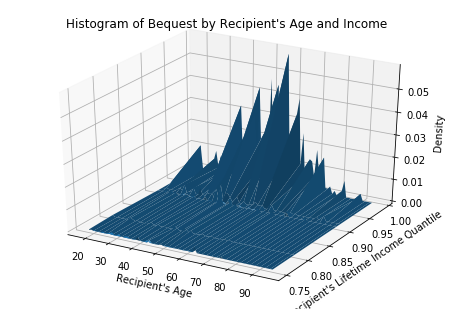

In [3]:
y_mat, x_mat = np.meshgrid(inc_vec, age_vec)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x_mat, y_mat, bq_data)
plt.title("Histogram of Bequest by Recipient's Age and Income")
plt.xlabel("Recipient's Age")
plt.ylabel("Recipient's Lifetime Income Quantile")
ax.set_zlabel("Density")

### Problem 1b

In [4]:
prob_inc = np.sum(bq_data, axis=0)
prob_age = np.sum(bq_data, axis=1)
num_sample = 10000
# draw a large sample using normal distribution
inc_probs = np.random.multinomial(num_sample, prob_inc)
age_probs = np.random.multinomial(num_sample, prob_age)
# empty sequence for further specificaton
age_freq = np.array([])
inc_freq = np.array([])

In [5]:
# creating a distribution of age 
for age, num_s in zip(age_vec, age_probs):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

# creating a distribution of income
for pct, num_j in zip(inc_vec, inc_probs):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= pct
    inc_freq = np.append(inc_freq, vec_abil_j)

In [6]:
# cross validation of bandwith
bandwith = 1.0
data = np.vstack((age_freq, inc_freq))
density = gaussian_kde(data, bw_method=bandwith)

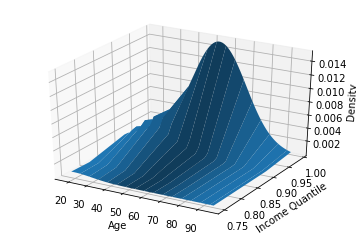

In [7]:
inc_mat, age_mat = np.meshgrid(inc_vec, age_vec)
coords = np.vstack([item.ravel() for item in [age_mat, inc_mat]])
BQkde = density(coords).reshape(age_mat.shape)
BQkde_scaled = BQkde / BQkde.sum()
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, inc_mat, BQkde_scaled, rstride =5)
ax.set_xlabel('Age')
ax.set_ylabel('Income Quantile')
ax.set_zlabel('Density')
plt.show()

In [8]:
print("The Normal kernel estimated probability of who are 61 and in 6th quantile income is: \n{}".format(BQkde_scaled[61,6]))

      

The Normal kernel estimated probability of who are 61 and in 6th quantile income is: 
0.004126497028804421


### Problem 2 Cross Term

In [9]:
import statsmodels.api as sm
import pandas as pd

C:\Users\xinyu\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
data = pd.read_csv('biden.csv')

In [11]:
data.head()

,biden,female,age,educ,dem,rep
0,90.0,0,19.0,12.0,1.0,0.0
1,70.0,1,51.0,14.0,1.0,0.0
2,60.0,0,27.0,14.0,0.0,0.0
3,50.0,1,43.0,14.0,1.0,0.0
4,60.0,1,38.0,14.0,0.0,1.0


In [12]:
X = data[['age', 'educ']]
y = data['biden']
X['age*educ'] = X['age'] * X['educ']
X['const'] = 1
model = sm.OLS(y, X, missing='drop', hasconst=True)

C:\Users\xinyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\xinyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  biden   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     10.13
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           1.29e-06
Time:                        01:55:53   Log-Likelihood:                -8333.3
No. Observations:                1826   AIC:                         1.667e+04
Df Residuals:                    1822   BIC:                         1.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.6674      0.169      3.950      0.0

### Problem 2a
A navie interpretation is that age has effect of 0.66-0.0477 $X_2$ marginal effect on y. For example if $X_2 = 0$, the $\beta_1 =0.66$, the effect of age on Biden decrease with increasing education. he effects of age and interaction term are both statistically significant at 1% significance level.

### Problem 2b
Similar the effect of education on age is 1.71 - 0.048 $X_1$. This means that if someone is age 0, we would expect them to rate bien 1.71 more for each level of eduction. But age decrease the marginal effects of eduction. The effects of education and interaction term are both statistically significant at 5% significance level.